# Compute Baseline for Yearly Aggregated Data

<a id='top'></a>

<a href=#readdata>Read in Data</a>

<a href=#overall_probability>Overall Probability of moving in Dataset</a>

<a href=#move_by_year>Move Probability by Year</a>

<a href=#prob_company_moves>Probability that Company Moves</a>

<a href=#prob_branch_moves>Probability that Branch Moves</a>

<a href=#plot_probabilities>Plot Probabilities</a>

<a href=#bottom>End of File</a>


In [1]:

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>
# Read in data

<a href=#top>Top</a>

In [32]:
data_df0 = pd.read_csv('2015_aggregated.csv')

data_df1 = pd.read_csv('2016_aggregated.csv')

data_df2 = pd.read_csv('2017_aggregated.csv')

/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
data_df = data_df0.append(data_df1).append(data_df2)

In [43]:
data_df.columns

Index(['Unnamed: 0', 'id_branch', 'id_company', 'date_month', 'code_sbi_1',
       'has_relocated', 'has_name_change', 'delta_qty_employees',
       'delta_qty_issued_credit_reports', 'delta_score_payment_assessment',
       'code_legal_form_has_changed', 'SBI_has_changed', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'years_in_current_location',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'unique_id', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'code_legal_form_group_1',
       'code_legal_form_group_2', 'SBI_group_1', 'SBI_group_2',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operati

In [39]:
data_df.head()

,Unnamed: 0,id_branch,id_company,date_month,code_sbi_1,has_relocated,has_name_change,delta_qty_employees,delta_qty_issued_credit_reports,delta_score_payment_assessment,...,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_employees,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd,has_relocated_next_year
0,0,0,428134.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
1,1,0,803351.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
2,2,0,810695.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
3,3,0,811258.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False
4,4,0,811333.0,2015-01-01,NaN,False,False,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,False


In [62]:
data_df['year'] = pd.DatetimeIndex(data_df['date_month']).year

In [63]:
data_df.groupby(['year']).agg(['mean', 'count'])

Unnamed: 0              id_branch             id_company           \
           mean    count          mean    count          mean    count   
year                                                                     
2015   945470.0  1890941  3.638208e+07  1890941  7.533486e+08  1890941   
2016   965050.5  1930102  3.792115e+07  1930102  7.632112e+08  1930102   
2017   983103.5  1966208  3.950941e+07  1966208  7.722793e+08  1966208   

     has_relocated          has_name_change            ...     \
              mean    count            mean    count   ...      
year                                                   ...      
2015      0.006781  1890941        0.002448  1890941   ...      
2016      0.006343  1930102        0.002408  1930102   ...      
2017      0.006163  1966208        0.001936  1966208   ...      

     qty_board_changes_year          variance_qty_employees           \
                       mean    count                   mean    count   
year                                                                   
2015               0.265753  1890941           10192.130654  1579770   
2016               0.266569  1930102            2296.814322  1614108   
2017               0.247831  1966208            1144.791014  1661273   

     variance_qty_issued_credit_reports           \
                                   mean    count   
year                                               
2015                           0.140032  1878229   
2016                           0.125883  1917383   
2017                           0.096303  1953013   

     variance_score_payment_assessment          variance_score_pd           
                                  mean    count              mean    count  
year                                                                        
2015                        279.741575  1890941        -40.559148  1890941  
2016                        277.497118  1930102        -40.481498  1930102  
2017                        274.795588  1966208        -39.784267  1966208  

[3 rows x 110 columns]

In [64]:
data_df.groupby(['year']).size()

year
2015    1890941
2016    1930102
2017    1966208
dtype: int64

In [80]:
data_df[data_df.has_relocated_next_year.isna()] = 0

<a id='overall_probability'></a>

# Overall Probability that branch moves 

<a href=#top>Top</a>

In [65]:
data_df['has_relocated_next_year'].value_counts()

False    5327484
True      236577
Name: has_relocated_next_year, dtype: int64

In [81]:
data_df['has_relocated_next_year'].value_counts() / data_df.shape[0]

False    0.959121
True     0.040879
Name: has_relocated_next_year, dtype: float64

<a id='move_by_year'></a>
# Move Probability By Year:
<a href=#top>Top</a>

In [82]:
data_df.groupby(['year'])['has_relocated_next_year'].value_counts() 

year  has_relocated_next_year
0     False                       223190
2015  False                      1708652
      True                        110237
2016  False                      1818077
      True                         34763
2017  False                      1800755
      True                         91577
Name: has_relocated_next_year, dtype: int64

In [83]:
year_to_check = [2015, 2016, 2017]
#year_to_check = [2015]

for this_year in year_to_check: 
    print(this_year, "\n",
          data_df[data_df.year==this_year]['has_relocated_next_year'].value_counts() / data_df[data_df.year==this_year].shape[0])

2015 
 False    0.939393
True     0.060607
Name: has_relocated_next_year, dtype: float64
2016 
 False    0.981238
True     0.018762
Name: has_relocated_next_year, dtype: float64
2017 
 False    0.951606
True     0.048394
Name: has_relocated_next_year, dtype: float64



<a id='prob_company_moves'></a>
# Probability that company moves over the whole dataset:

<a href=#top>Top</a>


Calculate the probability that any company has a branch that moves in the dataset.  Companies that have multiple moves do not affect the probability of move.

In [87]:
# Find number of unique companies:
num_unique_companies=data_df['id_company'].nunique()
print("The total number of companies in the dataset is %0.3d" % num_unique_companies) 

The total number of companies in the dataset is 1888178


In [88]:
num_companies_moved = data_df[data_df.has_relocated_next_year==True]['id_company'].nunique()
print("The number of companies involved in a move is %0.3d" % num_companies_moved) 

The number of companies involved in a move is 220295


In [89]:
prob_company_moved = num_companies_moved/ num_unique_companies
print("The probability that a company has a branch that moved is %8.3f %%" % (100*prob_company_moved)) 

The probability that a company has a branch that moved is   11.667 %


<a id='prob_branch_moves'></a>
## Probability that a branch moves:

<a href=#top>Top</a>

In [90]:
num_unique_branches=data_df['id_branch'].nunique()
print("The total number of branches in the dataset is %0.3d" % num_unique_branches) 

The total number of branches in the dataset is 2036213


In [91]:
num_branches_moved = data_df[data_df.has_relocated_next_year==True]['id_branch'].nunique()
print("The number of branches involved in a move is %0.3d" % num_branches_moved) 

The number of branches involved in a move is 221967


In [92]:
prob_branch_moved = num_branches_moved/ num_unique_branches
print("The probability that a branch moved is %8.3f %%" % (100*prob_branch_moved)) 

The probability that a branch moved is   10.901 %


<a id='plot_probabilities'></a>
# Plot Probabilities


<a href=#top>Top</a>

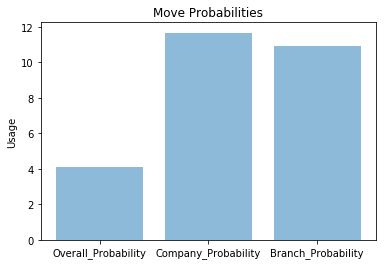

In [93]:
x_labels = ("Overall_Probability", "Company_Probability", "Branch_Probability")
y_pos = np.arange(len(x_labels))
all_probabilities = [prob_moved, prob_company_moved, prob_branch_moved]

all_probabilities = [i * 100 for i in all_probabilities]
 
plt.bar(y_pos, all_probabilities, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Usage')
plt.title('Move Probabilities')
 
plt.show()

<a id='bottom'></a>

<a href=#top>Top</a>

# End